**Context**
There is a big competition between Internet providers. If a providers want to increase its revenue they needs more subscriber but keep existing customer is more important than having new ones. So providers want to know which customer should cancel his service. we call this as churn. if the know who will go, maybe they can catch them with promotions.

***is_tv_subscriber***
customer has a tv subscription ?


---


***is_movie_package_subscriber***
is he/she has a sinema movie package subs


---


***subscription_age***
how many year has the customer use our service


---


***bill_avg***
last 3 months bill avg


---


***reamining_contract***
how many year remaining for customer contract. if null; customer hasnt have a contract. the customer who has a contract time have to use their service until contract end. if they canceled their service before contract time end they pay a penalty fare.


---


**service_failure_count**
customer call count to call center for service failure for last 3 months


---


***download_avg***
last 3 months internet usage (GB)
\
***upload_avg***
last 3 months upload avg (GB)


---


***download_over_limit***
most of customer has a download limit. if they reach this limit they have to pay for this. this column contain "limit over count" for last 9 months

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
path = "data/internet_service_churn.csv"
#Загружаем данные
data = pd.read_csv(path)
data = data.rename(columns={'reamining_contract': 'remaining_contract'})

In [7]:
print(data.head())

   id  is_tv_subscriber  is_movie_package_subscriber  subscription_age  \
0  15                 1                            0             11.95   
1  18                 0                            0              8.22   
2  23                 1                            0              8.91   
3  27                 0                            0              6.87   
4  34                 0                            0              6.39   

   bill_avg  remaining_contract  service_failure_count  download_avg  \
0        25                0.14                      0           8.4   
1         0                 NaN                      0           0.0   
2        16                0.00                      0          13.7   
3        21                 NaN                      1           0.0   
4         0                 NaN                      0           0.0   

   upload_avg  download_over_limit  churn  
0         2.3                    0      0  
1         0.0                    0

In [8]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72274 entries, 0 to 72273
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           72274 non-null  int64  
 1   is_tv_subscriber             72274 non-null  int64  
 2   is_movie_package_subscriber  72274 non-null  int64  
 3   subscription_age             72274 non-null  float64
 4   bill_avg                     72274 non-null  int64  
 5   remaining_contract           50702 non-null  float64
 6   service_failure_count        72274 non-null  int64  
 7   download_avg                 71893 non-null  float64
 8   upload_avg                   71893 non-null  float64
 9   download_over_limit          72274 non-null  int64  
 10  churn                        72274 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 6.1 MB
None


In [9]:
print(data.isnull().sum())

id                                 0
is_tv_subscriber                   0
is_movie_package_subscriber        0
subscription_age                   0
bill_avg                           0
remaining_contract             21572
service_failure_count              0
download_avg                     381
upload_avg                       381
download_over_limit                0
churn                              0
dtype: int64


In [10]:
print(data['churn'].value_counts(normalize=True))

churn
1    0.554141
0    0.445859
Name: proportion, dtype: float64


# EDA

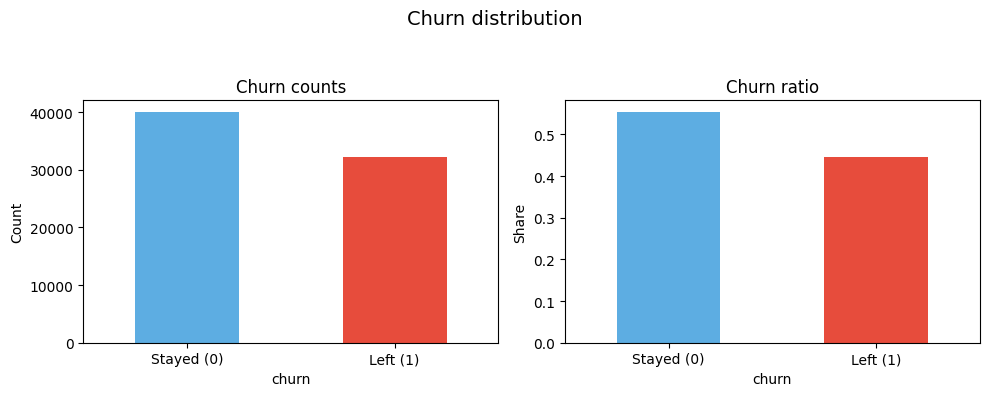

churn
1    0.554141
0    0.445859
Name: proportion, dtype: float64


In [11]:
churn_counts = data["churn"].value_counts()
churn_ratio = data["churn"].value_counts(normalize=True)

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Абсолютное количество
churn_counts.plot(kind="bar", ax=ax[0], title="Churn counts", color=["#5DADE2", "#E74C3C"])
ax[0].set_xticklabels(["Stayed (0)", "Left (1)"], rotation=0)
ax[0].set_ylabel("Count")

# Относительная доля
churn_ratio.plot(kind="bar", ax=ax[1], title="Churn ratio", color=["#5DADE2", "#E74C3C"])
ax[1].set_xticklabels(["Stayed (0)", "Left (1)"], rotation=0)
ax[1].set_ylabel("Share")

plt.suptitle("Churn distribution", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()

print(churn_ratio)

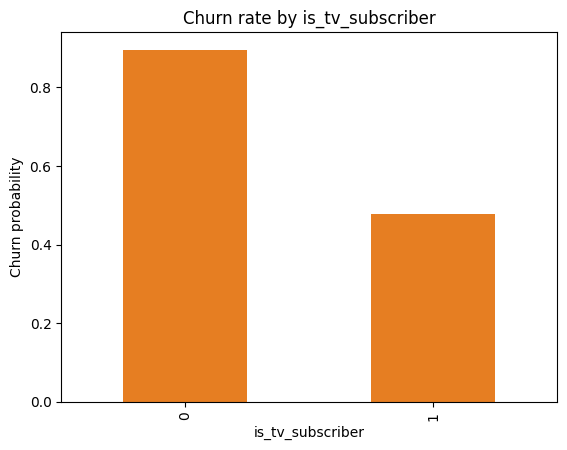

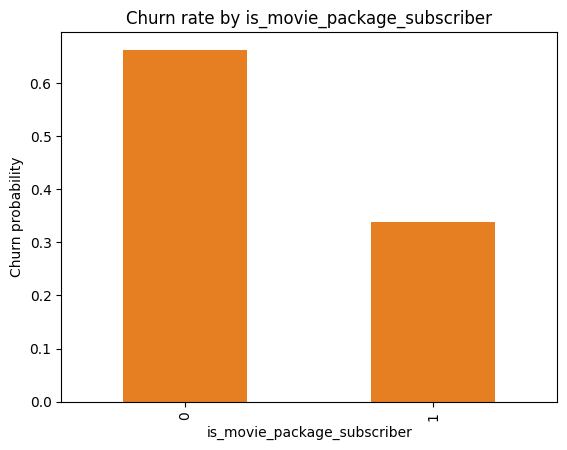

In [12]:
cat_cols = ["is_tv_subscriber", "is_movie_package_subscriber"]

for col in cat_cols:
    churn_rate = data.groupby(col)["churn"].mean()
    churn_rate.plot(kind="bar", color="#E67E22", title=f"Churn rate by {col}")
    plt.ylabel("Churn probability")
    plt.show()

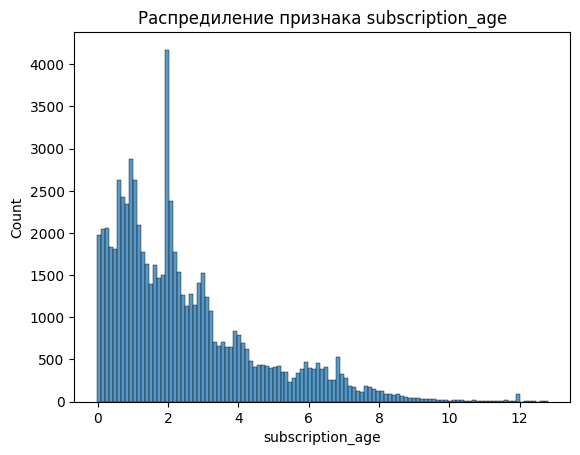

In [13]:
sns.histplot(data['subscription_age'])
plt.title('Распредиление признака subscription_age')
plt.show()

<Axes: xlabel='bill_avg', ylabel='Count'>

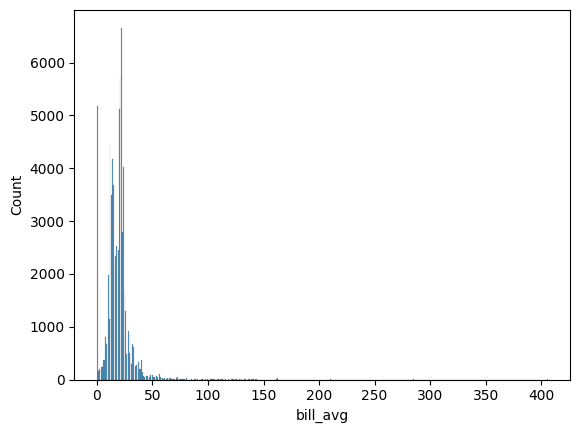

In [14]:
sns.histplot(data['bill_avg'])

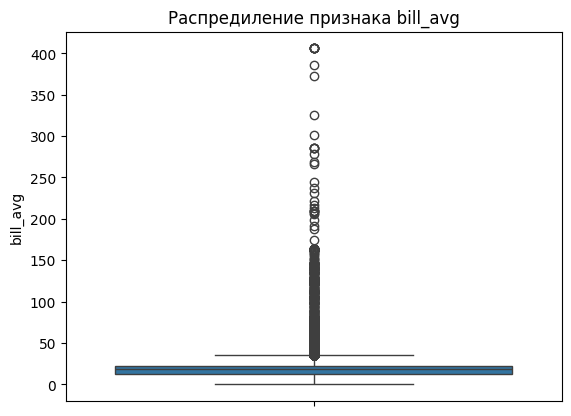

In [15]:
sns.boxplot(data['bill_avg'])
plt.title('Распредиление признака bill_avg')
plt.show()

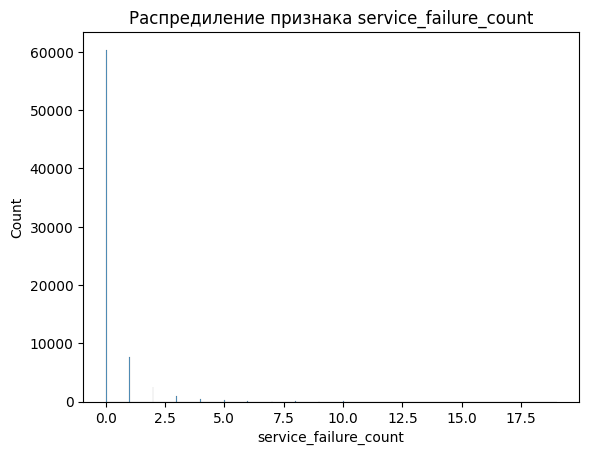

service_failure_count
0     60407
1      7665
2      2453
3       901
4       395
5       201
6        97
7        58
8        37
9        17
10       15
11        6
12        6
13        5
14        4
16        3
15        2
18        1
19        1
Name: count, dtype: int64


In [16]:
sns.histplot(data['service_failure_count'])
plt.title('Распредиление признака service_failure_count')
plt.show()
print(data['service_failure_count'].value_counts())

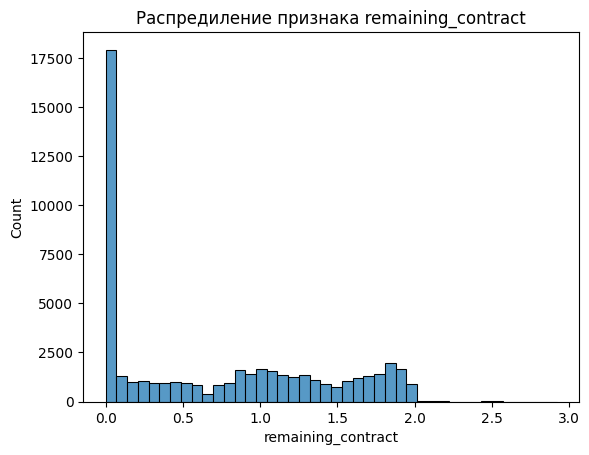

In [17]:
sns.histplot(data['remaining_contract'])
plt.title('Распредиление признака remaining_contract')
plt.show()

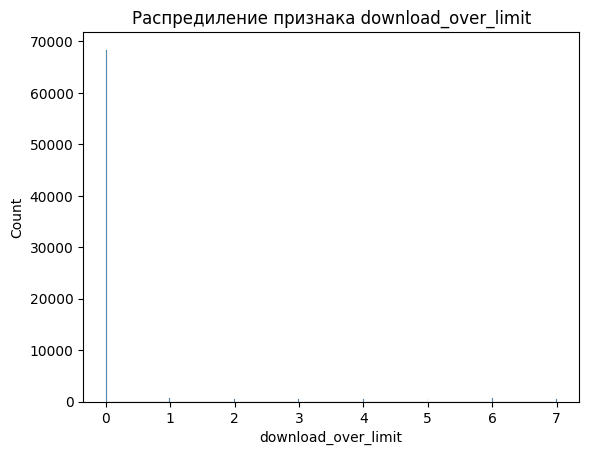

download_over_limit
0    0.946025
1    0.010599
6    0.009519
2    0.007748
7    0.006973
3    0.006890
4    0.006309
5    0.005936
Name: proportion, dtype: float64


In [18]:
sns.histplot(data['download_over_limit'])
plt.title('Распредиление признака download_over_limit')
plt.show()
print(data['download_over_limit'].value_counts(normalize=True))

In [19]:
print(data[data['download_over_limit'] > 0]['churn'].value_counts(normalize=True))
tab = pd.crosstab(data['download_over_limit'], data['churn'])
print(tab)

churn
1    0.884645
0    0.115355
Name: proportion, dtype: float64
churn                    0      1
download_over_limit              
0                    31774  36599
1                      202    564
2                      105    455
3                       52    446
4                       32    424
5                       32    397
6                       26    662
7                        1    503


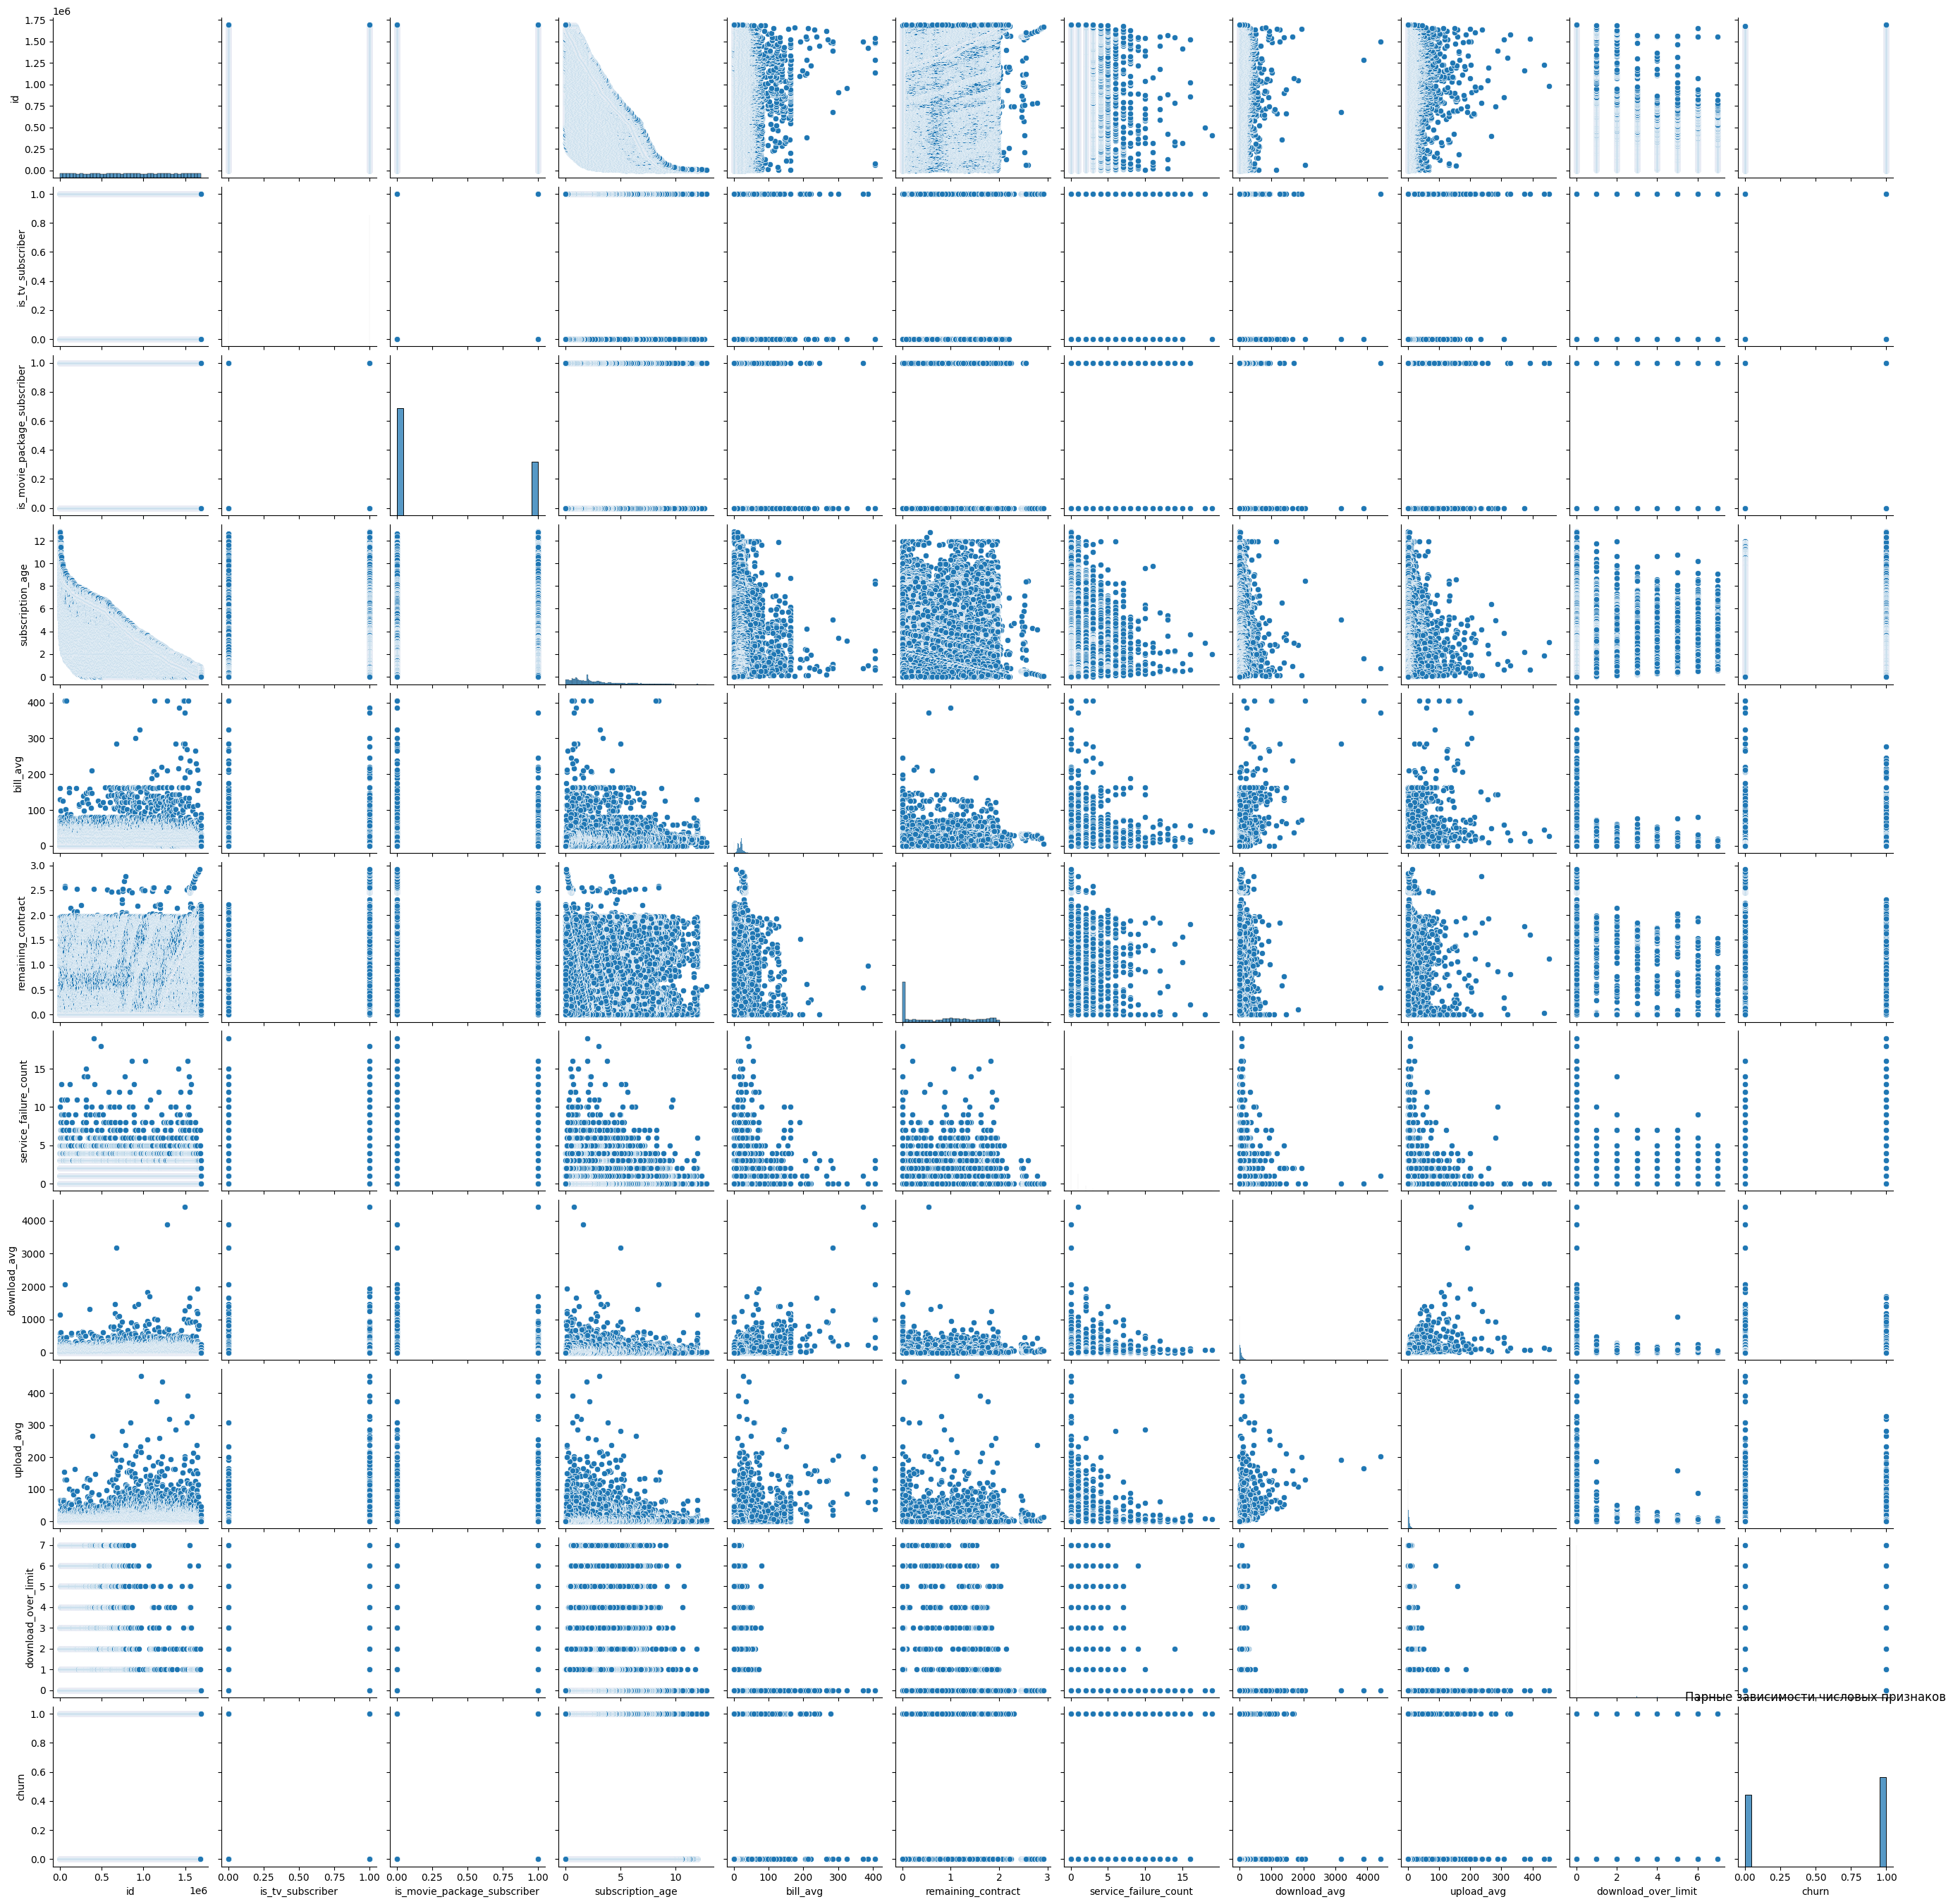

In [20]:
sns.pairplot(data.select_dtypes(include={'number'}))
plt.title('Парные зависимости числовых признаков')
plt.show()

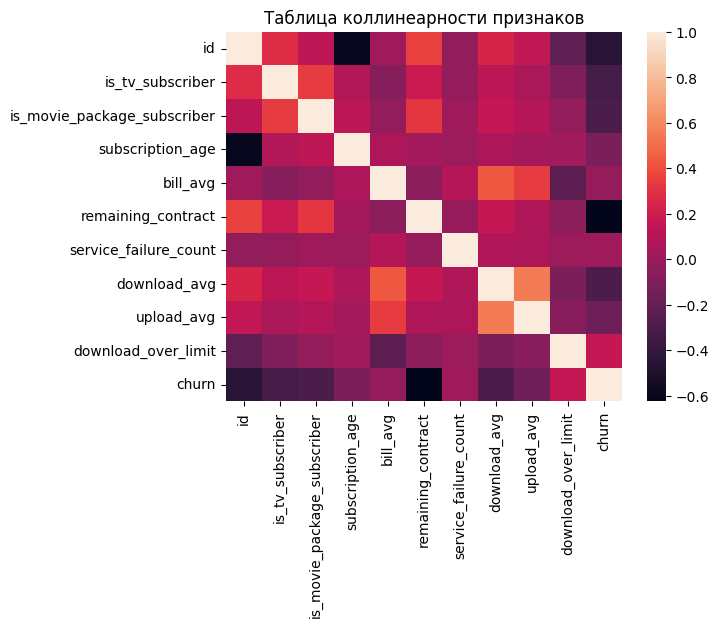

In [21]:
sns.heatmap(data.corr())
plt.title('Таблица коллинеарности признаков')
plt.show()

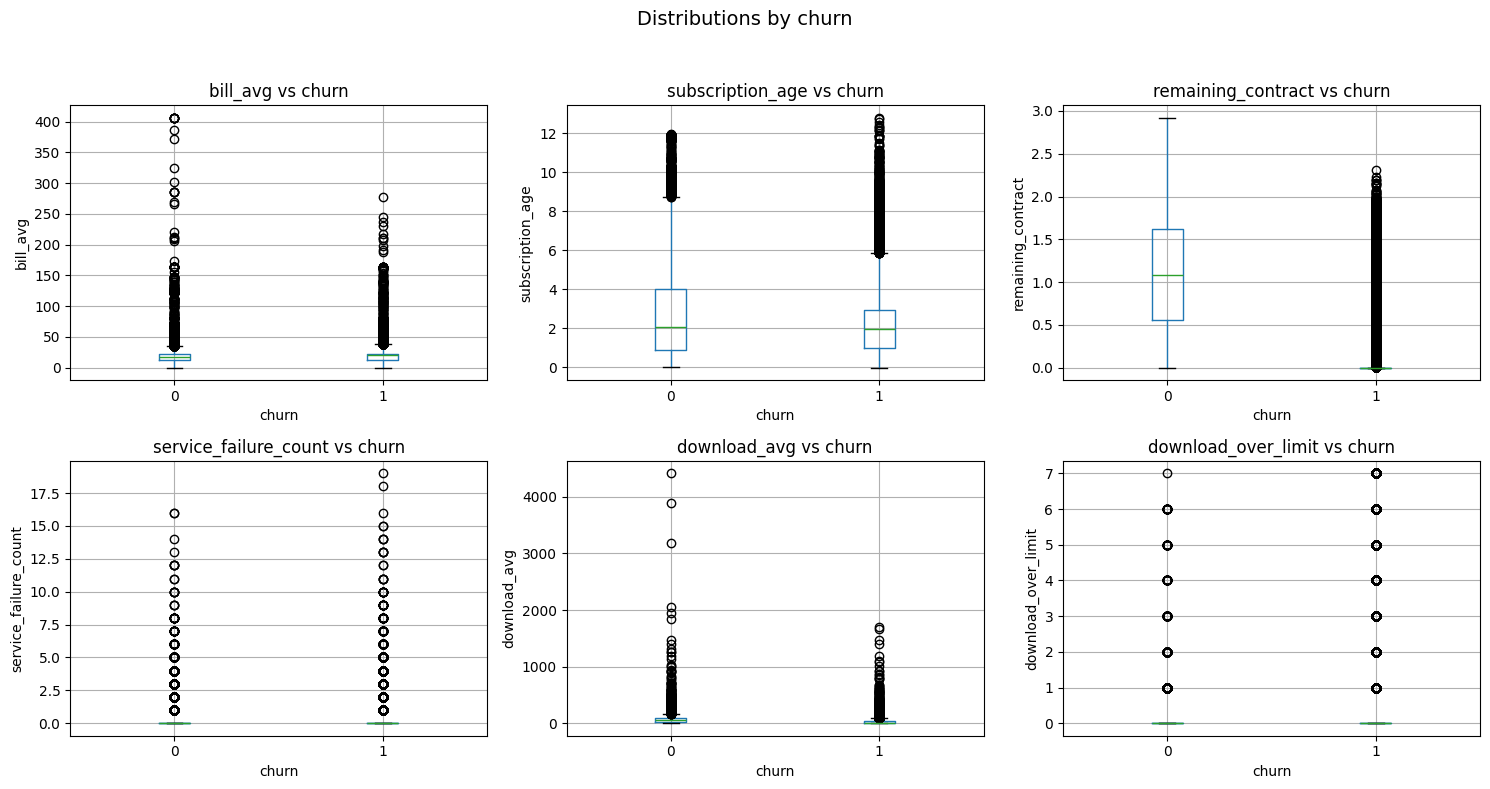

In [22]:
num_cols = ["bill_avg", "subscription_age", "remaining_contract",
             "service_failure_count", "download_avg", "download_over_limit"]

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
for i, col in enumerate(num_cols):
    ax = axes[i // 3, i % 3]
    data.boxplot(column=col, by="churn", ax=ax)
    ax.set_title(f"{col} vs churn")
    ax.set_xlabel("churn")
    ax.set_ylabel(col)

plt.suptitle("Distributions by churn", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

- Клиенты без контракта и без дополнительных подписок чаще уходят.
- Перерасход лимита (`download_over_limit`) резко повышает churn.
- Активные пользователи (высокий `download_avg`) более лояльны.
- Много обращений в поддержку (`service_failure_count`) — тревожный сигнал.
- `reamining_contract` — главный удерживающий фактор.

# Первичная обработка данных

In [23]:
data = data.drop('id', axis=1)
# Id ненужный признак, убираем его


In [24]:
data['is_tv_subscriber'] = data['is_tv_subscriber'].astype(bool)
data['is_movie_package_subscriber'] = data['is_movie_package_subscriber'].astype(bool)
data['churn'] = data['churn'].astype(bool)
# Приводим к булевым признакам для удобства


Обработка Na

In [25]:
data['download_avg'] = data['download_avg'].fillna(data['download_avg'].mean())
data['upload_avg'] = data['upload_avg'].fillna(data['upload_avg'].mean())
# Заполняем средними значениями использованные гб

# Проверка гипотез

MNAR NA in remainning_contract column

**Признак Remaining_contract**

Нужно выяснить природу пропусков значений в remaining_contract
Предположим, что пропуски в remaining_contract являются отдельным классом и обозначают, что контракта нет
Проверим распределения для нет контракта и remaining contract = 0 (истекший контракт),
чтобы убедиться что это разные подгруппы

In [26]:
# Для удобства разделим данные на три категории по признаку remaining_contract

data['no_contract'] = data['remaining_contract'].isna()
data['contract_expired'] = data['remaining_contract'] == 0
data['contract_is_active'] = ~data['no_contract'] & ~data['contract_expired']

In [27]:
from scipy.stats import chi2_contingency, ttest_ind
# Сравним распределения для no_contract и contract_expired

t_stat, p_val = ttest_ind(data[data['no_contract'] == True]['churn'], data[data['contract_expired'] == True]['churn'], equal_var=False)
print(f"Результаты сравнения no_contract и contract_remaining=0:\nt_stat: {t_stat}, p_val: {p_val}/n")

Результаты сравнения no_contract и contract_remaining=0:
t_stat: -41.22697460116026, p_val: 0.0/n


In [28]:
crosstab = pd.crosstab(data['contract_expired'], data['churn'])
print('Распредиление наблюдений с истекшим контрактом:\n', crosstab)

Распредиление наблюдений с истекшим контрактом:
 churn             False  True 
contract_expired              
False             32152  23759
True                 72  16291


Т-тест показал, что Nan и 0 в remaining_contract разные подмножества, следовательно нужно их разделять

In [29]:
data['remaining_contract'] = data['remaining_contract'].fillna(-1)

In [30]:
# Проведем тест Хи квадрат для no_contract и churn, чтобы увидеть взаимосвязь

crosstab = pd.crosstab(data['no_contract'], data['churn'])
print('Результаты сравнения no_contract и churn:\n', crosstab)
chi2, p, dof, expected = chi2_contingency(crosstab)
print(f"Тест chi2: {chi2}, p: {p}")

Результаты сравнения no_contract и churn:
 churn        False  True 
no_contract              
False        30371  20331
True          1853  19719
Тест chi2: 16124.387041206843, p: 0.0


Отсутствие контракта сильно влияет на отток клиентов.
Виден перекос значений в сторону churn = 1 для наблюдений без контракта. Наблюдений с отсутствующим контрактом много. Следует оставить фичу no_contract

In [31]:
tab = data[data['bill_avg'] == 0]['churn'].value_counts()
print(tab)

churn
True     4793
False     380
Name: count, dtype: int64


churn                            False      True 
is_tv_subscriber              0.956989   0.701223
is_movie_package_subscriber   0.496214   0.204619
subscription_age              2.727828   2.226554
bill_avg                     19.252731  18.692859
remaining_contract            0.953573  -0.399384
service_failure_count         0.254593   0.290037
download_avg                 64.634132  26.838312
upload_avg                    5.962381   2.767698
download_over_limit           0.031622   0.349213
no_contract                   0.057504   0.492360
contract_expired              0.002234   0.406767
contract_is_active            0.940262   0.100874


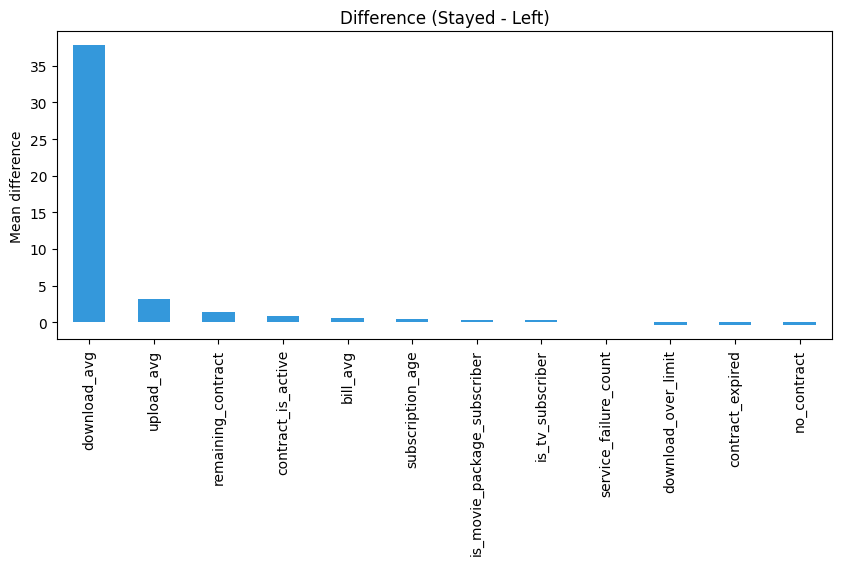

In [32]:
group_stats = data.groupby("churn").mean(numeric_only=True).T
print(group_stats)

# Для наглядности можно отобразить разницу между группами
diff = group_stats[False] - group_stats[True]
diff.sort_values(ascending=False).plot(kind="bar", figsize=(10, 4), color="#3498DB", title="Difference (Stayed - Left)")
plt.ylabel("Mean difference")
plt.show()

  Выделим по смыслу категории наблюдений 

In [33]:
data['had_service_failure'] = data['service_failure_count'] > 0
group_failure = data.groupby('had_service_failure').mean()
print(group_failure)
data['service_failure_count'] = np.log1p(data['service_failure_count'])

                     is_tv_subscriber  is_movie_package_subscriber  \
had_service_failure                                                  
False                        0.816809                     0.331270   
True                         0.807365                     0.351732   

                     subscription_age   bill_avg  remaining_contract  \
had_service_failure                                                    
False                        2.437720  18.402784            0.203997   
True                         2.512821  21.689728            0.203065   

                     service_failure_count  download_avg  upload_avg  \
had_service_failure                                                    
False                             0.000000     41.483438    3.927927   
True                              1.670178     54.921597    5.536681   

                     download_over_limit     churn  no_contract  \
had_service_failure                                               
False  

In [34]:
data['bill_avg_is_zero'] = (data['bill_avg'] == 0).astype(bool)
data['bill_avg_is_high'] = (data['bill_avg'] > data['bill_avg'].quantile(0.75)).astype(bool)
data['bill_avg'] = np.log1p(data['bill_avg'])

Признак download_over_limit имеет сильный перекос и высокую информативность (пользователи с превышенным лимитом трафика гораздо чаще отказываются от услуг)

In [35]:
def group_download_over_limit(x):
    if x == 0:
        return 0
    elif x <= 3:
        return 1
    else:
        return 2

data['download_over_limit'] = data['download_over_limit'].map(group_download_over_limit)

In [36]:
print(data['download_over_limit'].value_counts())

download_over_limit
0    68373
2     2077
1     1824
Name: count, dtype: int64


# Добавление новых фичей

In [37]:
data['download_upload_ratio'] = data['download_avg'] / data['upload_avg']
# Соотношение трафика загруженного и выгруженного

data['download_limit_exeeded'] = (data['download_over_limit'] > 0).astype(bool)
# Лимит передачи данных был превышен

data['data_intensity'] = data['download_avg'] + data['upload_avg']
# Активность использования трафика

data['inactive_user'] = ((data['data_intensity'] == 0) & (data['bill_avg'] == 0)).astype(bool)

data['bill_to_intensity_ratio'] = data['bill_avg'] / (data['data_intensity'] + 1)
# Отношение счёта к объёму трафика — показатель "цены за 1 ГБ"

data['intensity_to_exeeding_ratio'] = data['data_intensity'] * 3 / (data['download_over_limit'] + 1)

data['premium_package_subscriber'] = ((data['is_tv_subscriber'] == True) | (data['is_movie_package_subscriber'] == True)).astype(bool)
# пользователь дополнительно подписан на тв или на фильмы

data['subscription_combo'] = np.select(
    [
        (data['is_tv_subscriber'] == 0) & (data['is_movie_package_subscriber'] == 0),
        (data['is_tv_subscriber'] == 1) & (data['is_movie_package_subscriber'] == 0),
        (data['is_tv_subscriber'] == 0) & (data['is_movie_package_subscriber'] == 1),
        (data['is_tv_subscriber'] == 1) & (data['is_movie_package_subscriber'] == 1)
    ],
    ['none', 'tv_only', 'movie_only', 'both'],
    default=''
)

# Средняя стоимость одной услуги — если клиент платит много за мало сервисов,
# риск оттока выше.
data['avg_cost_per_package'] = data['bill_avg'] / (
    1 + data['is_tv_subscriber'] + data['is_movie_package_subscriber']
)

# Fill NaN and infinite values in the new ratio columns
data['download_upload_ratio'] = data['download_upload_ratio'].replace([np.inf, -np.inf], 0).fillna(0)
data['intensity_to_exeeding_ratio'] = data['intensity_to_exeeding_ratio'].replace([np.inf, -np.inf], 0).fillna(0)

In [38]:
data = data.drop(['download_upload_ratio', 'intensity_to_exeeding_ratio'], axis=1)

**Проверка фичей на коллинеарность**

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

def get_vif(X):
    vif = pd.DataFrame()
    vif['feature'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

In [41]:
numeric_cols = data.select_dtypes(include={'number'})
if 'churn' in numeric_cols.columns:
  numeric_cols = numeric_cols.drop('churn')
numeric_cols = numeric_cols.drop(['data_intensity'], axis=1)
X = add_constant(numeric_cols)
vif = get_vif(X)
print(vif)

                   feature        VIF
0                    const  16.160818
1         subscription_age   1.068579
2                 bill_avg   2.274016
3       remaining_contract   1.270064
4    service_failure_count   1.015040
5             download_avg   1.660364
6               upload_avg   1.451727
7      download_over_limit   1.378472
8  bill_to_intensity_ratio   1.280620
9     avg_cost_per_package   1.952737


In [42]:
print(data.columns)

Index(['is_tv_subscriber', 'is_movie_package_subscriber', 'subscription_age',
       'bill_avg', 'remaining_contract', 'service_failure_count',
       'download_avg', 'upload_avg', 'download_over_limit', 'churn',
       'no_contract', 'contract_expired', 'contract_is_active',
       'had_service_failure', 'bill_avg_is_zero', 'bill_avg_is_high',
       'download_limit_exeeded', 'data_intensity', 'inactive_user',
       'bill_to_intensity_ratio', 'premium_package_subscriber',
       'subscription_combo', 'avg_cost_per_package'],
      dtype='object')


# Обучение логистической регрессии

In [43]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
)
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [44]:
X = data.drop('churn', axis=1)
y = data['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

In [45]:
numeric_cols = X_train.select_dtypes(include={'number'})
cat_cols = X_train.select_dtypes(exclude={'number'})

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols.columns),
        ('cat', OneHotEncoder(drop='first'), cat_cols.columns)
    ])

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

pipeline.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessor', ...), ('classifier', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transforme

In [46]:
y_pred_lr = pipeline.predict(X_test)

precision = precision_score(y_test, y_pred_lr)
recall = recall_score(y_test, y_pred_lr)
accuracy = accuracy_score(y_test, y_pred_lr)
f1 = f1_score(y_test, y_pred_lr)
roc_auc = roc_auc_score(y_test, y_pred_lr)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'Accuracy: {accuracy}')
print(f'F1-score: {f1}')
print(f'ROC AUC: {roc_auc}')

Precision: 0.953834316491408
Recall: 0.9261611256381521
Accuracy: 0.9340712556208924
F1-score: 0.939794048897593
ROC AUC: 0.9350606375388768


In [47]:
# pip install catboost

# Обучение catboost

In [49]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(cat_features=['subscription_combo'])
model.fit(X_train, y_train, eval_set=(X_test, y_test))

Learning rate set to 0.086326
0:	learn: 0.5776828	test: 0.5778283	best: 0.5778283 (0)	total: 214ms	remaining: 3m 34s
1:	learn: 0.4963719	test: 0.4966790	best: 0.4966790 (1)	total: 281ms	remaining: 2m 20s
2:	learn: 0.4312458	test: 0.4314831	best: 0.4314831 (2)	total: 348ms	remaining: 1m 55s
3:	learn: 0.3772345	test: 0.3775330	best: 0.3775330 (3)	total: 418ms	remaining: 1m 44s
4:	learn: 0.3366994	test: 0.3368803	best: 0.3368803 (4)	total: 487ms	remaining: 1m 36s
5:	learn: 0.3102864	test: 0.3107813	best: 0.3107813 (5)	total: 552ms	remaining: 1m 31s
6:	learn: 0.2895735	test: 0.2902434	best: 0.2902434 (6)	total: 613ms	remaining: 1m 26s
7:	learn: 0.2703233	test: 0.2711538	best: 0.2711538 (7)	total: 687ms	remaining: 1m 25s
8:	learn: 0.2597128	test: 0.2606539	best: 0.2606539 (8)	total: 751ms	remaining: 1m 22s
9:	learn: 0.2501049	test: 0.2513426	best: 0.2513426 (9)	total: 814ms	remaining: 1m 20s
10:	learn: 0.2412631	test: 0.2425777	best: 0.2425777 (10)	total: 878ms	remaining: 1m 18s
11:	learn: 

In [50]:
# метрики
y_pred = model.predict(X_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'Accuracy: {accuracy}')
print(f'F1-score: {f1}')
print(f'ROC AUC: {roc_auc}')

Precision: 0.9625976687588061
Recall: 0.9357489727306687
Accuracy: 0.9441023867173989
F1-score: 0.948983457507261
ROC AUC: 0.9451472136380616


Получение важности фичей

In [ ]:
feature_importance = model.get_feature_importance()
feature_names = model.feature_names_

# Сортировка по важности
important_features = sorted(zip(feature_names, feature_importance),
                           key=lambda x: x[1], reverse=True)

for i in range(len(important_features)):
    print(f"{i+1}. {important_features[i][0]}: {important_features[i][1]}")


1. remaining_contract: 19.36940102600748
2. contract_is_active: 14.344778564952724
3. subscription_age: 11.93872958005877
4. bill_avg: 10.390650385206904
5. contract_expired: 9.592751857255514
6. download_avg: 9.499008585714073
7. avg_cost_per_package: 7.448939879731017
8. data_intensity: 5.120982351652411
9. upload_avg: 4.344744710152926
10. bill_to_intensity_ratio: 3.4265869937526747
11. download_over_limit: 1.5331023640401935
12. subscription_combo: 0.9570787062963094
13. no_contract: 0.5294541424601639
14. service_failure_count: 0.45186836803549746
15. bill_avg_is_high: 0.30551511339623344
16. download_limit_exeeded: 0.25981887121402764
17. is_tv_subscriber: 0.23079674807883663
18. premium_package_subscriber: 0.15126997763892072
19. had_service_failure: 0.07440107790045082
20. is_movie_package_subscriber: 0.030120696454861432
21. bill_avg_is_zero: 0.0
22. inactive_user: 0.0


Вычислим ROC-AUC и PR-AUC и визуализируем их кривые 

In [ ]:

from sklearn.metrics import roc_curve, precision_recall_curve, auc, classification_report, fbeta_score

In [ ]:
y_pred_proba = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

precision, recall, pr_thresholds = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)

In [53]:
f_beta = fbeta_score(y_test, y_pred, beta=2)

In [ ]:
#Функция для подсчета f beta скоров по каждому порогу
def find_fbeta_scores(precision, recall, beta):
  f_beta_scores = []
  for p, r in zip(precision, recall):
      if p + r > 0:
          f_beta = (1 + beta**2) * (p * r) / (beta**2 * p + r)
      else:
        f_beta = 0
      f_beta_scores.append(f_beta)
  return f_beta_scores

beta = 1
f_beta_scores = find_fbeta_scores(precision, recall, beta)

# Находим оптимальный порог
optimal_idx = np.argmax(f_beta_scores)
optimal_threshold = pr_thresholds[optimal_idx]

print(f"Оптимальный порог: {optimal_threshold:.3f}")
print(f"Максимальный F{beta}-score: {f_beta_scores[optimal_idx]:.3f}")

Оптимальный порог: 0.450
Максимальный F1-score: 0.950


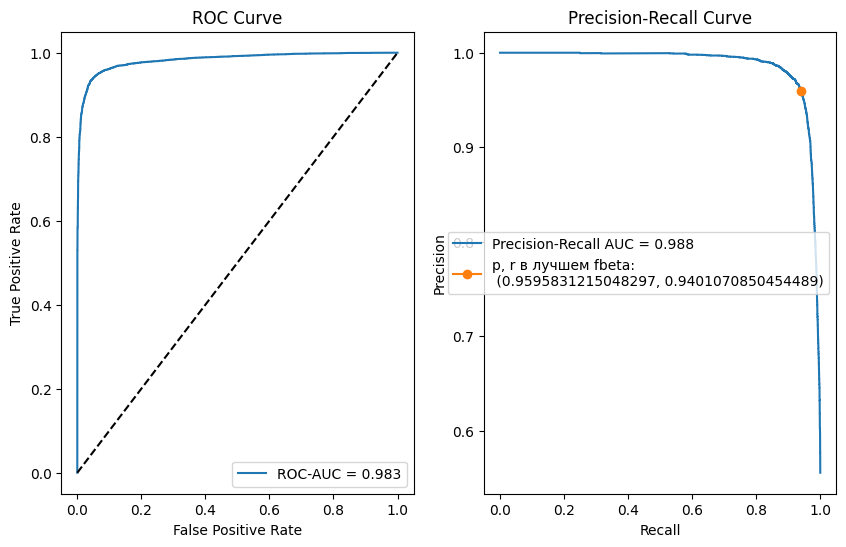

In [ ]:
#Отрисовываем кривые ROC и PR
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f'ROC-AUC = {roc_auc:.3f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(recall, precision, label=f'Precision-Recall AUC = {pr_auc:.3f}')
plt.plot(recall[optimal_idx], precision[optimal_idx], marker='o', label=f'p, r в лучшем fbeta:\n {float(precision[optimal_idx]), float(recall[optimal_idx])}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()
